# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

### **Importing Required Packages**

In [108]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

### **Understanding and Examining the Dataset**

In [109]:
penguins_df.isna().sum().sort_values()
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


### **Handling missing values in Categorical Variable by replacing with its mode**

In [110]:
penguins_df["sex"].fillna(penguins_df['sex'].mode()[0], inplace = True)
penguins_df.shape

(344, 5)

### **Using KNN Imputer to impute the missing values in numerical features**

In [111]:
penguins_num = penguins_df.drop('sex', axis= 1)
knn = KNNImputer(n_neighbors = 3 ,weights = 'distance')
penguins_imputed_num = knn.fit_transform(penguins_num)
penguins_imputed_num = pd.DataFrame(penguins_imputed_num, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
penguins_imputed_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.00000,3750.000000
1,39.50000,17.40000,186.00000,3800.000000
2,40.30000,18.00000,195.00000,3250.000000
3,43.92193,17.15117,214.01462,4201.754386
4,36.70000,19.30000,193.00000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386
340,46.80000,14.30000,215.00000,4850.000000
341,50.40000,15.70000,222.00000,5750.000000
342,45.20000,14.80000,212.00000,5200.000000


### **Concatinating both Datasets**

In [112]:
penguins_df1 = penguins_df.drop(columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
penguins_df1
penguins_imputed = pd.concat([penguins_imputed_num, penguins_df1], axis = 1)
penguins_imputed.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### **Checking for outliers**

In [113]:
penguins_imputed.boxplot()

<AxesSubplot: >

In [114]:
penguins_imputed.query('flipper_length_mm >= 5000 | flipper_length_mm < 0')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE
14,34.6,21.1,-132.0,4400.0,MALE


### **Dealing with outliers**

In [133]:
penguins_imputed[penguins_imputed['flipper_length_mm']>4000]
penguins_imputed[penguins_imputed['flipper_length_mm']<0]
penguins_clean = penguins_imputed.drop([9,14])
penguins_clean.boxplot()

<AxesSubplot: >

In [116]:
penguins_clean.shape

(342, 5)

### **Creating Dummy Variable**

In [135]:
penguins_clean['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [118]:
#print(penguins_clean.loc[penguins_clean['sex'] == '.'])
#penguins_clean.drop(penguins_clean[penguins_clean['sex'] == '.'].index, inplace = True)
#penguins_clean['sex'].unique()

In [119]:
penguins_clean.shape

(342, 5)

In [136]:
penguins_dummy = pd.get_dummies(penguins_clean, drop_first= True)
penguins_dummy

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.00000,3750.000000,0,1
1,39.50000,17.40000,186.00000,3800.000000,1,0
2,40.30000,18.00000,195.00000,3250.000000,1,0
3,43.92193,17.15117,214.01462,4201.754386,0,1
4,36.70000,19.30000,193.00000,3450.000000,1,0
...,...,...,...,...,...,...
339,43.92193,17.15117,214.01462,4201.754386,0,1
340,46.80000,14.30000,215.00000,4850.000000,1,0
341,50.40000,15.70000,222.00000,5750.000000,0,1
342,45.20000,14.80000,212.00000,5200.000000,1,0


### **Scaling the Data using StandardScaler**

In [137]:
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_dummy)

### **Performing PCA**

In [138]:
pca =PCA()
transformed = pca.fit_transform(penguins_preprocessed)

In [139]:
features = range(pca.n_components_)

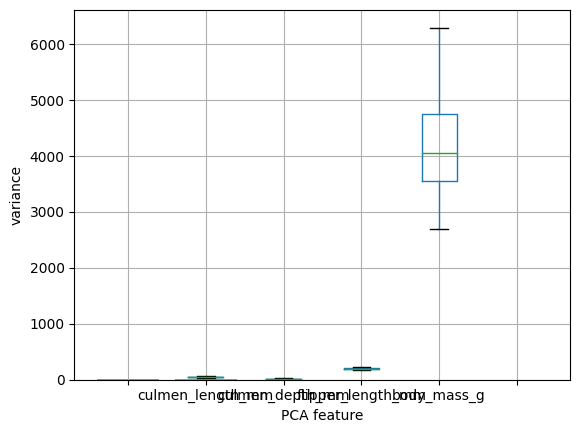

In [140]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [125]:
n_components = 2
model = PCA(n_components = n_components)
penguins_PCA = model.fit_transform(penguins_preprocessed)

### **Detecting the optimal number of clusters for k-means clustering**

In [126]:
ks = range(1,10)
inertias = []

for k in ks:
    km = KMeans(n_clusters = k, random_state=42)
    km.fit(penguins_PCA)
    inertias.append(km.inertia_)

### **Plotting KS vs Inertias**

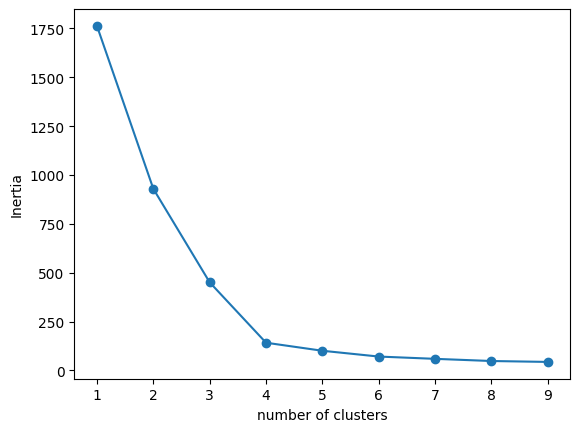

In [127]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### **Running the k-means clustering algorithm**

In [128]:
n_cluster = 4
kmeans = KMeans(n_clusters = n_cluster, random_state=42).fit(penguins_PCA)

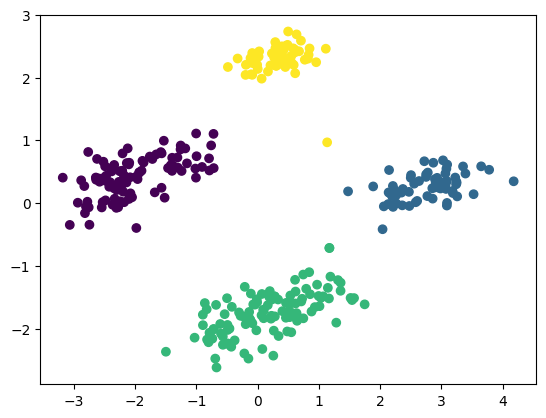

In [129]:
labels = kmeans.predict(penguins_PCA)
xs = penguins_PCA[:, 0]
ys = penguins_PCA[:, 1]
plt.scatter(xs,ys, c = labels)
plt.show()

### **Creating a final statistical DataFrame for each cluster.**

In [130]:
penguins_clean['label'] = kmeans.labels_
numeric_columns = penguins_imputed_num.columns
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,40.217757,17.611215,189.046729,3419.158879
1,49.310938,15.645313,221.250000,5438.281250
2,43.626284,19.031271,194.741332,3987.084900
3,45.545763,14.262712,212.779661,4683.050847


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


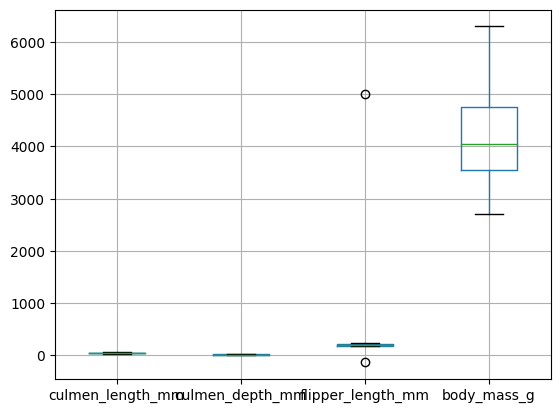

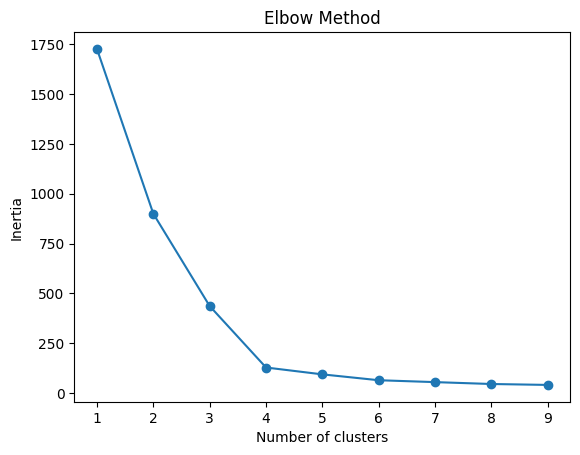

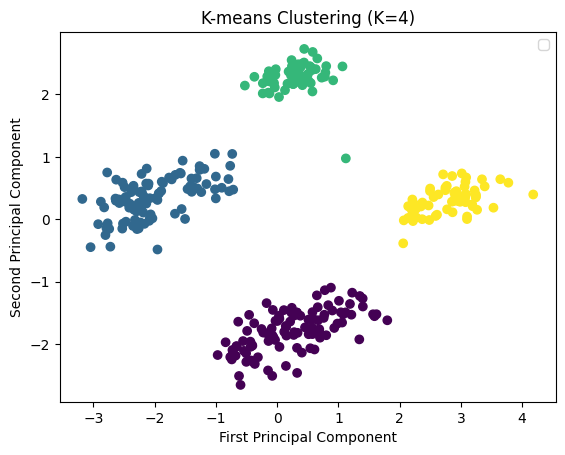

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [131]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()

penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins